5.40605447122
0.556233278945


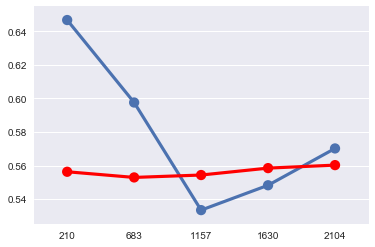

In [100]:
import pandas as pd
import seaborn as sns

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
answer = train.y
train = train.drop('y', axis=1)
complete = pd.concat([train, test])

complete = complete.select_dtypes(include=['int64'])
# complete = complete.drop('ID', axis=1)

columns = ['X118', 'X119', 'X136', 'X232', 'X263', 'X279', 'X314', 'X315']
complete = complete[columns]

train = complete.head(len(train))
test = complete.tail(len(test))

from sklearn.linear_model import LinearRegression, Ridge, LassoLarsIC
from lightgbm.sklearn import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
import numpy as np

model = GradientBoostingRegressor()
predictions = cross_val_predict(model, train, answer, cv=5)

report = train.copy()
report['expected'] = answer
report['actual'] = predictions
report['diff'] = np.abs(report.expected - report.actual).round(0)
report['underestimated'] = report['actual'] < report['expected']

print mean_absolute_error(answer, predictions)
print r2_score(answer, predictions)

train_sizes, train_scores, test_scores = learning_curve(model, train, answer, cv=2)

data = { 'x': train_sizes, 'y': map(lambda x: np.mean(x), train_scores) }
sns.pointplot(x='x', y='y', data=data)

data = { 'x': train_sizes, 'y': map(lambda x: np.mean(x), test_scores) }
sns.pointplot(x='x', y='y', data=data, color='red')

In [40]:
pd.options.display.max_rows = 2000
report[['expected', 'actual', 'diff', 'underestimated']].sort_values('diff').tail(2000)

,expected,actual,diff,underestimated
1072,104.93,102.187864,3.0,True
2976,91.19,93.885387,3.0,False
1657,88.47,91.171287,3.0,False
1055,100.55,103.575116,3.0,False
3294,100.46,104.017932,4.0,False
3917,89.14,93.082212,4.0,False
328,89.05,92.711447,4.0,False
2267,92.26,96.054692,4.0,False
2656,89.00,92.539619,4.0,False
2652,89.86,94.109965,4.0,False


In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

# def plot_boxes(cols, dato):
#     return map(lambda x: sns.boxplot(x='answer', y=x, data=dato, ax=plt.figure().add_subplot(111)), cols)

# [
#     sns.pairplot(knn_report[knn_report['predicted'] == knn_report['expected']], hue='expected', markers='+', plot_kws={'s': 1 }),
#     sns.pairplot(rr_report[rr_report['predicted'] == rr_report['expected']], hue='expected', markers='+', plot_kws={'s': 1 })
# ]

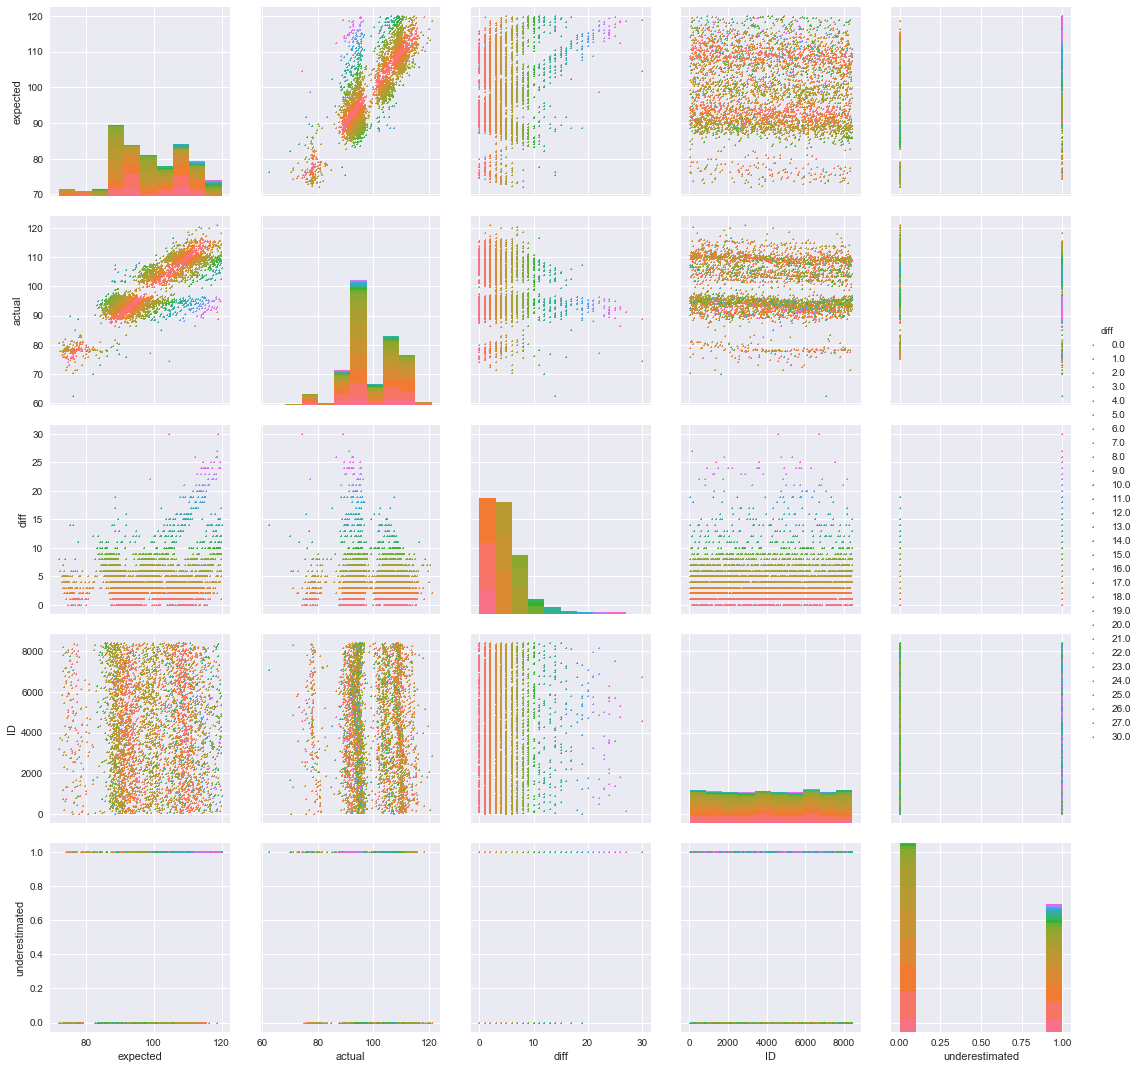

In [41]:
sns.pairplot(report[['expected', 'actual', 'diff', 'ID', 'underestimated']], markers='+', hue='diff', plot_kws={'s': 1}, size=3)

220

In [93]:
import time

model.fit(train, answer)
predictions = model.predict(test)

submission_response = pd.DataFrame({
    'ID': test['ID'],
    'y': predictions
})

timestr = time.strftime("%Y%m%d_%H%M")
pd.DataFrame(submission_response).to_csv('./outputs/naive.' + timestr + '.csv', header=True, index=False, line_terminator="\n")
pd.DataFrame(submission_response).to_csv('./outputs/_naive.latest.csv', header=True, index=False, line_terminator="\n")